In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [2]:
births = pd.read_csv('C:/Users/GVL/Desktop/Паша/Datasets/Time_Series_Datasets-main/births.csv', parse_dates = True)

In [3]:
births.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
births.shape

(365, 2)

In [6]:
y = births['Births'].tolist()

In [7]:
y_mean = sum(y) / len(y)
y_mean

41.98082191780822

In [8]:
sigma = np.sqrt(reduce(lambda x, y:x+y, list(map(lambda x: (x - y_mean) ** 2, y))) / (len(y) - 1))
sigma

7.3482572041253285

In [9]:
'''
Пороговое значения теста Ирвина для n > 100 = 1
'''

'\nПороговое значения теста Ирвина для n > 100 = 1\n'

In [10]:
y_new = []
y_new.append(y[0])
out = []
lambd = 1
for i in range(1, len(y)):
    if abs(y[i] - y[i - 1]) / sigma > lambd:
        out.append(i)
    else:
        y_new.append(i)   

In [11]:
births = pd.read_csv('C:/Users/GVL/Desktop/Паша/Datasets/Time_Series_Datasets-main/births.csv', index_col = 'Date', parse_dates = True)

In [12]:
births = births.iloc[y_new]

In [13]:
births?

In [14]:
births.to_csv('C:/Users/GVL/Desktop/Паша/Datasets/Time_Series_Datasets-main/my_data.csv', index= False)

In [15]:
births.to_csv('C:/Users/GVL/Desktop/Паша/Datasets/Time_Series_Datasets-main/my_data_time.csv', index=True)

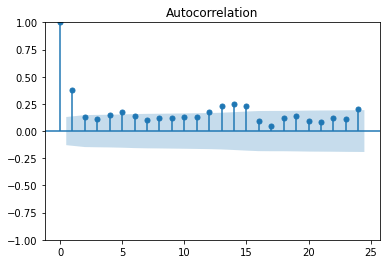

In [27]:
plot_acf(births)
plt.show()

In [13]:
'''
На графике отчётливо видно отсутсвие сезонности а также тренда
https://habr.com/ru/companies/tinkoff/articles/677186/
'''

'\nНа графике отчётливо видно отсутсвие сезонности а также тренда\nhttps://habr.com/ru/companies/tinkoff/articles/677186/\n'

In [14]:
'''
Будем строить аддитивную модель временного ряда, т.к. Аддитивная модель используется, 
когда дисперсия временного ряда не изменяется при различных значениях временного ряда.
Исходя из самих наших данных и анализу автокорреляций можно сделать вывод, что так и есть
'''

'\nБудем строить аддитивную модель временного ряда, т.к. Аддитивная модель используется, \nкогда дисперсия временного ряда не изменяется при различных значениях временного ряда.\nИсходя из самих наших данных и анализу автокорреляций можно сделать вывод, что так и есть\n'

In [ ]:
'''
Осталось произвести декомпозицию очищенного от выброса датасета. 
Мы помним, что значение временного ряда - y(t) = Level + Trend + Seasonality + Noise 
значит, для того, чтобы найти сезонное значение, нужно из значения вычесть среднее, вычесть значения шума и тренда.
Это мы и произведем с помощью библиотеки statsmodels : проведем декомпозицию временного ряда вполне коротким кодом. 
Здесь важно правильно назначить частоту freq, у нас в данных 1 цикла (1 год) по 12 месяцев, частота будет равняться 12:
'''

In [14]:
seasonal_decompose?

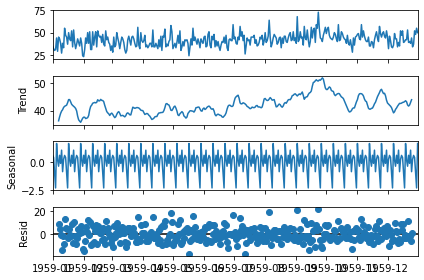

In [15]:
decompose = seasonal_decompose(births, period=12)
decompose.plot()
 
plt.show()

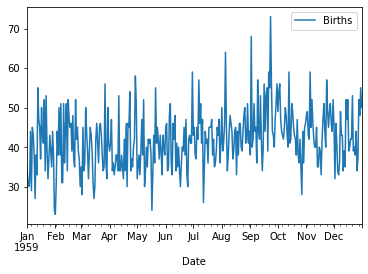

In [20]:
births.plot()
pyplot.show()

In [32]:
data = births['Births'].tolist()

In [ ]:
'''
Для нахождения уравнения тренда используем полиномиальную аппроксимацию функцией polyfit

'''

In [40]:
for i in range(7):
    x = np.arange(0,len(y))
    y=np.array(data)
    z = np.polyfit(x,y,i)
    print(*z)

41.030567685589475
0.03324573061664978 37.24055439529145
-0.00010061366227312082 0.05618564561492162 36.372660944523474
-4.166560142918495e-06 0.0013243499066050064 -0.07348687246501719 38.809443644876374
1.9145923306152022e-08 -1.2897101170523919e-05 0.00260214062266192 -0.1378989333364709 39.529273634552105
1.1662468834523613e-09 -6.45614800261696e-07 0.0001216819579454619 -0.008866976141054196 0.23242105365184887 36.80098926331386
1.2430735270649965e-11 -7.336376041672243e-09 1.5554446411043996e-06 -0.00014533389708467826 0.006270974565110788 -0.10824663702058182 38.56958832096775


In [ ]:
'''
Как можно заметить линейная подгонка ax+b имеет значимые коэффициенты её и будем использовать
0.03324573061664978x + 37.24055439529145
'''

In [ ]:
"""
Критерий Фишера
https://math.semestr.ru/corel/fisher.php
"""

In [56]:
data_mean = sum(data) / len(data)
data_mean

41.03056768558952

In [78]:
r_2_1 = reduce(lambda x, y:x+y, list(map(lambda x: ((0.03324573061664978 * x + 37.24055439529145) - x) ** 2, data))) 
r_2_1

In [80]:
r_2_2 = reduce(lambda x, y:x+y, list(map(lambda x: ((0.03324573061664978 * x + 37.24055439529145) - data_mean) ** 2, data))) 
r_2_2

In [93]:
a = (r_2_1 - r_2_2) / r_2_1
np.sqrt(a) #Связь очень высокая прям пиздец какая высокая

0.9195527382839781

In [97]:
F = (1 - r_2_2 / r_2_1) * (len(data) - 2 - 1) / 1
F

191.10045589773705

In [90]:
len(data) - 2 #количество степеней свободы

227

In [ ]:
'''
F > F_tabl(1, 227) 
Поскольку фактическое значение F > Fтабл, то найденная оценка уравнения регрессии статистически надежна.
https://www.chem-astu.ru/science/reference/fischer.html

'''

In [ ]:
#Критерий Стьюдента

In [99]:
sigma_y = np.sqrt(r_2_1 / len(data) - 2 - 1)
sigma_y

5.946342900501531

In [108]:
x_mean = sum(data) / len(data)
sigma_x = np.sqrt(reduce(lambda x, y:x+y, list(map(lambda x: (x - x_mean) ** 2, data))) / (len(data)))
sigma_x

5.894556005962398

In [110]:
sigma_a = sigma_y / sigma_x / len(data) * np.sqrt(reduce(lambda x, y:x+y, list(map(lambda x: x ** 2, data))))
sigma_a

2.763278768264504

In [112]:
sigma_b = sigma_y / sigma_x / np.sqrt(len(data))
sigma_b

0.06666242528463215

In [113]:
t_b = 37.24055439529145 / sigma_b
t_a = 0.03324573061664978 / sigma_a

In [ ]:
#Кэффициенты значимы

In [ ]:
"""
Во всех тестах уровень значимости alpha = 0.05
"""

In [ ]:
#Тест Дарбина-Уотсона

In [143]:
a = []
b = []
c = []
for i in range(len(data)):
    a.append(0.03324573061664978)
    b.append(37.24055439529145)
    c.append(-0.00010061366227312082)


In [144]:
births["a"] = a
births["b"] = b
births["c"] = c

C:\Users\GVL\AppData\Local\Temp\ipykernel_12272\1408140687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births["a"] = a
C:\Users\GVL\AppData\Local\Temp\ipykernel_12272\1408140687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births["b"] = b
C:\Users\GVL\AppData\Local\Temp\ipykernel_12272\1408140687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [145]:
births

,Births,a,b,c
Date,,,,
1959-02-05,50,0.033246,37.240554,-0.000101
1959-01-02,32,0.033246,37.240554,-0.000101
1959-01-03,30,0.033246,37.240554,-0.000101
1959-01-04,31,0.033246,37.240554,-0.000101
1959-01-08,43,0.033246,37.240554,-0.000101
...,...,...,...,...
1959-12-25,44,0.033246,37.240554,-0.000101
1959-12-27,37,0.033246,37.240554,-0.000101
1959-12-29,48,0.033246,37.240554,-0.000101


In [114]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson



In [146]:
#fit multiple linear regression model
model = ols('Births ~ a + b + c', data=births).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Births   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 21 Jun 2023   Prob (F-statistic):                nan
Time:                        01:19:47   Log-Likelihood:                -731.19
No. Observations:                 229   AIC:                             1464.
Df Residuals:                     228   BIC:                             1468.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0296      0.000    105.105      0.0

In [147]:
durbin_watson(model.resid)

1.219085189429363

In [ ]:
'''
Автокорреляция должна попадать в промежуток 1.5 до 2.5 следовательно автокрреляции вызывают проблемы
что было видно ещё на графике автокорреляций(на бесконечности они не попадали в синюю область)
Если посчитать автокорреляции с лагом 12(по месяцам) всё сойдётся

'''


In [ ]:
#Построим прогноз

In [153]:
alpha = 0.2
 
# первое значение совпадает со значением временного ряда
exp_smoothing = [births['Births'][0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(births['Births'])):
    exp_smoothing.append(alpha * births['Births'][i] + (1 - alpha) * exp_smoothing[i - 1])
 
# выведем прогнозное значение для следующих 120 дней-го дня (1 января 1960 года)
n = [0 for _ in range(120)]
for i in range(120):
    n[i] = int(exp_smoothing[-i])
    


[50,
 45,
 44,
 42,
 40,
 41,
 41,
 41,
 42,
 42,
 42,
 43,
 40,
 39,
 40,
 40,
 40,
 39,
 40,
 42,
 44,
 45,
 45,
 45,
 45,
 44,
 42,
 42,
 43,
 42,
 40,
 39,
 40,
 41,
 41,
 43,
 42,
 43,
 44,
 44,
 44,
 42,
 42,
 42,
 41,
 39,
 37,
 40,
 41,
 41,
 43,
 44,
 44,
 45,
 45,
 44,
 45,
 46,
 47,
 47,
 46,
 46,
 48,
 49,
 50,
 49,
 48,
 48,
 46,
 45,
 44,
 46,
 46,
 44,
 42,
 43,
 43,
 42,
 42,
 42,
 44,
 44,
 44,
 43,
 42,
 41,
 42,
 42,
 41,
 42,
 42,
 41,
 42,
 43,
 43,
 43,
 42,
 41,
 42,
 42,
 42,
 42,
 41,
 41,
 40,
 40,
 41,
 43,
 43,
 42,
 41,
 41,
 42,
 42,
 43,
 42,
 39,
 39,
 39,
 40]

In [1]:
'''
Все значения ожидаемо колебаются около среднего(на самом деле хороший показатель по таком короткому промежутку для данной задачи)

'''

'\nВсе значения ожидаемо колебаются около среднего(на самом деле хороший показатель по таком короткому промежутку для данной задачи)\n\n'